In [1]:
import sys
sys.path.append("../lib/")

import numpy as np
import matplotlib.pyplot as plt

from DalitzModel import *
from BWRes import *

%matplotlib inline
plt.rc('animation', html='html5')
plt.rc('text', usetex=True)
plt.rc('font', size=18)

In [2]:
degtorad = np.pi / 180.

In [3]:
model = DalitzModel(.475, .135, .135, 1.865)
model.add_bw(.770, .1490, 1, 'BC')
model.add_bw(.89166, 0.0508, 1, 'AB', 0.338*np.exp(1j*133.2*degtorad))

In [4]:
print model

Phase space D -> ABC, where
 mD = 1.865, mA = 0.475, mB = 0.135, mC = 0.135


In [5]:
mab_sq_range = model.mass_sq_range['AB']
mab_sq_range

[0.37209999999999999, 2.9929000000000001]

In [6]:
dens = model.density(1., 1.)
dens

0.34211998574390007

In [7]:
majorant = model.assess_majorant()
majorant

28.533679122245253

In [8]:
rtype1, rtype2 = 'AB', 'BC'
mab_sq, mbc_sq = model.sample(10**6, rtype1, rtype2)

57355 events generated
114612 events generated
171516 events generated
228830 events generated
286255 events generated
343666 events generated
400903 events generated
458559 events generated
516498 events generated
574078 events generated
631591 events generated
688866 events generated
746374 events generated
803915 events generated
861462 events generated
918812 events generated
976528 events generated
1034549 events generated


In [9]:
def plot_ddist(mab, mbc, bins=200, num=None):
    """ Scatter plot of Dalitz distribution """
    fig = plt.figure(num=num, figsize=(8,6))
    ax = fig.add_subplot(111)
    hist = ax.hist2d(mab, mbc, bins=bins, cmap=plt.cm.PuBu)
    fig.colorbar(hist[3], ax=ax, pad=0.02)

In [10]:
def phsp_edge(phsp, rtype1, rtype2):
    """ Calculate phase space edges """
    mr1_min, mr1_max = phsp.mass_sq_range[rtype1]
    mr1_space = np.linspace(mr1_min, mr1_max, 1000)
    mr2_mins, mr2_maxs = phsp.mr_sq_range(rtype2, mr1_space, rtype1)
    mr1 = np.concatenate([mr1_space, mr1_space[::-1]])
    mr2 = np.concatenate([mr2_mins, mr2_maxs[::-1]])
    return [mr1, mr2]

In [11]:
def show_phase_space(phsp, rtype1, rtype2, num=None, color=None):
    """ Plot phase space edge """
    if color is None:
        color = 'blue'
    mr1, mr2 = phsp_edge(phsp, rtype1, rtype2)
    mr1_range = max(mr1) - min(mr1)
    mr2_range = max(mr2) - min(mr2)
    fig = plt.figure(num=num)
    plt.plot(mr1, mr2, linestyle='-', color=color)
    plt.gca().set_xlabel(r'$m^{2}_{\mathrm{' + rtype1 + r'}}\ (GeV^{2}/c^{4})$')
    plt.gca().set_ylabel(r'$m^{2}_{\mathrm{' + rtype2 + r'}}\ (GeV^{2}/c^{4})$')
    plt.axis('equal')
    plt.tight_layout()
    plt.xlim(0, 1.05*max(mr1))
    plt.ylim(0, 1.05*max(mr2))

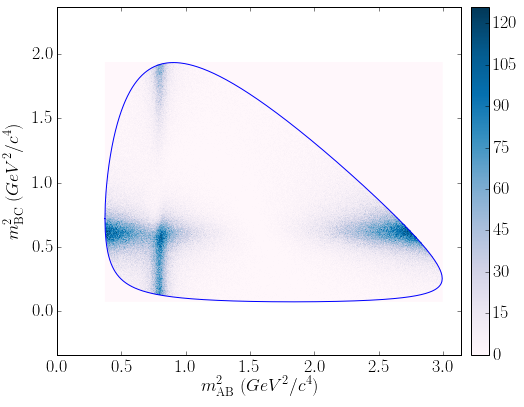

In [23]:
plot_ddist(mab_sq, mbc_sq, 400, 5)
show_phase_space(model, rtype1, rtype2, 5)

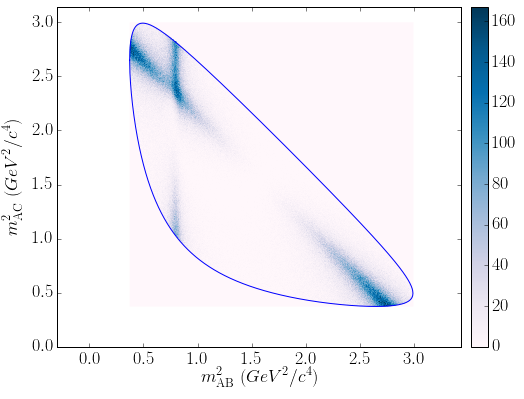

In [22]:
mac_sq = model.third_mass_sq(mab_sq, mbc_sq)
plot_ddist(mab_sq, mac_sq, 400, 5)
show_phase_space(model, 'AB', 'AC', 5)

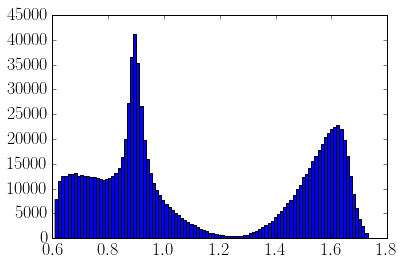

In [19]:
plt.hist(np.sqrt(mab_sq), bins=100);

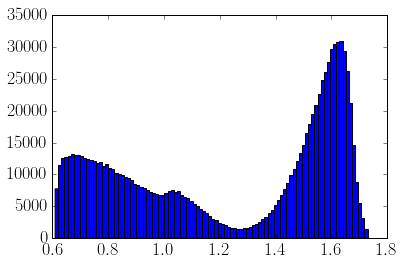

In [20]:
plt.hist(np.sqrt(mac_sq), bins=100);

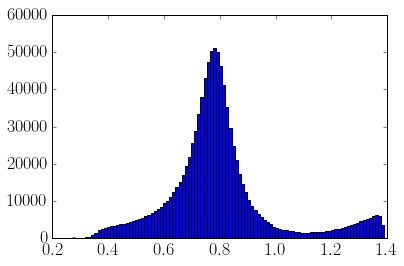

In [18]:
plt.hist(np.sqrt(mbc_sq), bins=100);